# Data Scientist Professional Case Study

### Company Background

Snow Cone Games are a digital retailer for video games. The website includes a simple filter for the genre of the game as well as more advanced filtering. The product manager has recently learned that only 23% of buyers search for games using the genre filter. 

71% of buyers use advanced filters to find the types of games that appeal to them. The product manager hopes that new categories based on different game attributes can help players find what they are looking for faster.


### Customer Question

The product manager would like to know:
- Can you use the data from 40,000 games to identify groupings of games that are most similar to each other?


### Success Criteria

Ideally, there would be no more than five groupings. Any more would make it much harder to display on the page so there would need to be a good reason to have more.


### Dataset

The data you will use for this analysis can be accessed here: `"data/video_games.csv"`

# <div align="center">Case Study Project - Video Game Categories</div> 

###  <div align="center">September 6 2022 </div>

<img src="jeux.png" width="800" height="400" alt="logo">

# Work Plan

My goal in this project is to explore data, analyze, and categorize video games. This will be done through the following steps:

- Motivation
- Data validation, including a summary of any changes you make to the data
- Exploratory Analysis, including graphics to support your findings
- Model Development, including justification for your choice of models
- Model Evaluation, including explanation of what this means about your models
- Comparision to the business success criteria
- Final summary including recommendations for future work that the business should
undertake

# 1-Motivation

The objective in this project is to use statistical analysis and machine learning methods to identify groups of video games that are similar.

Thus, to perform this task I will use variables to do clustering in order to be able to group the similar games.

# 2-DATASET Description

**<div align="center"> Table 1. Raw dataset description</div>**
<div align="center">
<table style="border: 1px solid black; text-align:center">
  <tr style="border: 1px solid black; text-align:center">
    <th style="border: 1px solid black; text-align:center">Column Name </th>
    <th style="border: 1px solid black; text-align:center">Details</th>
    
  </tr>
  <tr style="border: 1px solid black; text-align:center">
    <td style="border: 1px solid black; text-align:center">name</td>
    <td style="border: 1px solid black; text-align:center">Character, name of the game title</td>

    
  </tr>
  <tr style="border: 1px solid black; text-align:center">
    <td style="border: 1px solid black; text-align:center">release_date</td>
    <td style="border: 1px solid black; text-align:center">Character, release day of the video game</td>    
  </tr>
    <tr style="border: 1px solid black; text-align:center">
    <td style="border: 1px solid black; text-align:center">developer</td>
    <td style="border: 1px solid black; text-align:center">Character, name of the developer that created the video game</td>
  </tr>
    <tr style="border: 1px solid black; text-align:center">
    <td style="border: 1px solid black; text-align:center">achievement</td>
    <td style="border: 1px solid black; text-align:center">Numeric, number of ‘achievements’ players can earn in the
game.</td>
  </tr>
    <tr style="border: 1px solid black; text-align:center">
    <td style="border: 1px solid black; text-align:center">original_price</td>
    <td style="border: 1px solid black; text-align:center">Character, the price of the video game (or “Free” for free titles).</td>
  </tr>
  <tr style="border: 1px solid black; text-align:center">
    <td style="border: 1px solid black; text-align:center">percent_positive</td>
    <td style="border: 1px solid black; text-align:center">Character, the percentage of players who review the game
positively.</td>
  </tr>
  <tr style="border: 1px solid black; text-align:center">
    <td style="border: 1px solid black; text-align:center">num_reviews</td>
    <td style="border: 1px solid black; text-align:center">Numeric, the total number of players who reviewed the game.</td>
  </tr>
  <tr style="border: 1px solid black; text-align:center">
    <td style="border: 1px solid black; text-align:center">multiplayer</td>
    <td style="border: 1px solid black; text-align:center">Character, whether or not the game has multiplayer (True) or not
(False).
</td>
  </tr>
   </tr>
  <tr style="border: 1px solid black; text-align:center">
    <td style="border: 1px solid black; text-align:center">mature</td>
    <td style="border: 1px solid black; text-align:center">Character, whether or not the game has mature content
unsuitable for younger players (True) or not (False).</td>
  </tr>
   

  </tr>
</table>
</div>

# Libraries

In [305]:
# Importing Libraries

import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score




pd.set_option("display.precision",2)
plt.style.use("fivethirtyeight")

# 3-Data validation or prepocessing of Data

## a) Data import

In [306]:
# we import data "video_games" in order to assign at df_game
df_game = pd.read_csv("data/video_games.csv")

In [307]:
# the shape of df_game
df_game.shape

(40833, 9)

we notice que we have 40833 observations in our data and 9 variables

## b) Visualisation of lines of df_game

In [308]:
df_game.head(10)

name  release_date  \
0                                        DOOM  May 12, 2016   
1               PLAYERUNKNOWN'S BATTLEGROUNDS  Dec 21, 2017   
2                                  BATTLETECH  Apr 24, 2018   
3                                        DayZ  Dec 13, 2018   
4                                  EVE Online   May 6, 2003   
5  Grand Theft Auto V: Premium Online Edition           NaN   
6                             Devil May Cry 5   Mar 7, 2019   
7                            Human: Fall Flat  Jul 22, 2016   
8                           They Are Billions  Dec 12, 2017   
9                        Warhammer: Chaosbane  May 31, 2019   

             developer  achievements original_price percent_positive  \
0          id Software          54.0         $19.99              92%   
1     PUBG Corporation          37.0         $29.99              49%   
2  Harebrained Schemes         128.0         $39.99              71%   
3  Bohemia Interactive           NaN         $44.99              61%   
4                  CCP           NaN           Free              74%   
5       Rockstar North           NaN            NaN              NaN   
6     CAPCOM Co., Ltd.          51.0         $59.99              92%   
7      No Brakes Games          55.0         $14.99              91%   
8      Numantian Games          34.0         $29.99              85%   
9         Eko Software          43.0         $49.99              44%   

   num_reviews multiplayer  mature  
0      42550.0        True   False  
1     836608.0        True    True  
2       7030.0        True   False  
3     167115.0        True   False  
4      11481.0        True   False  
5          NaN        True   False  
6       9645.0        True    True  
7      23763.0        True   False  
8      12127.0       False   False  
9        904.0        True    True

we have missing value in our data , we will visualize in the following.

## c) Missing value

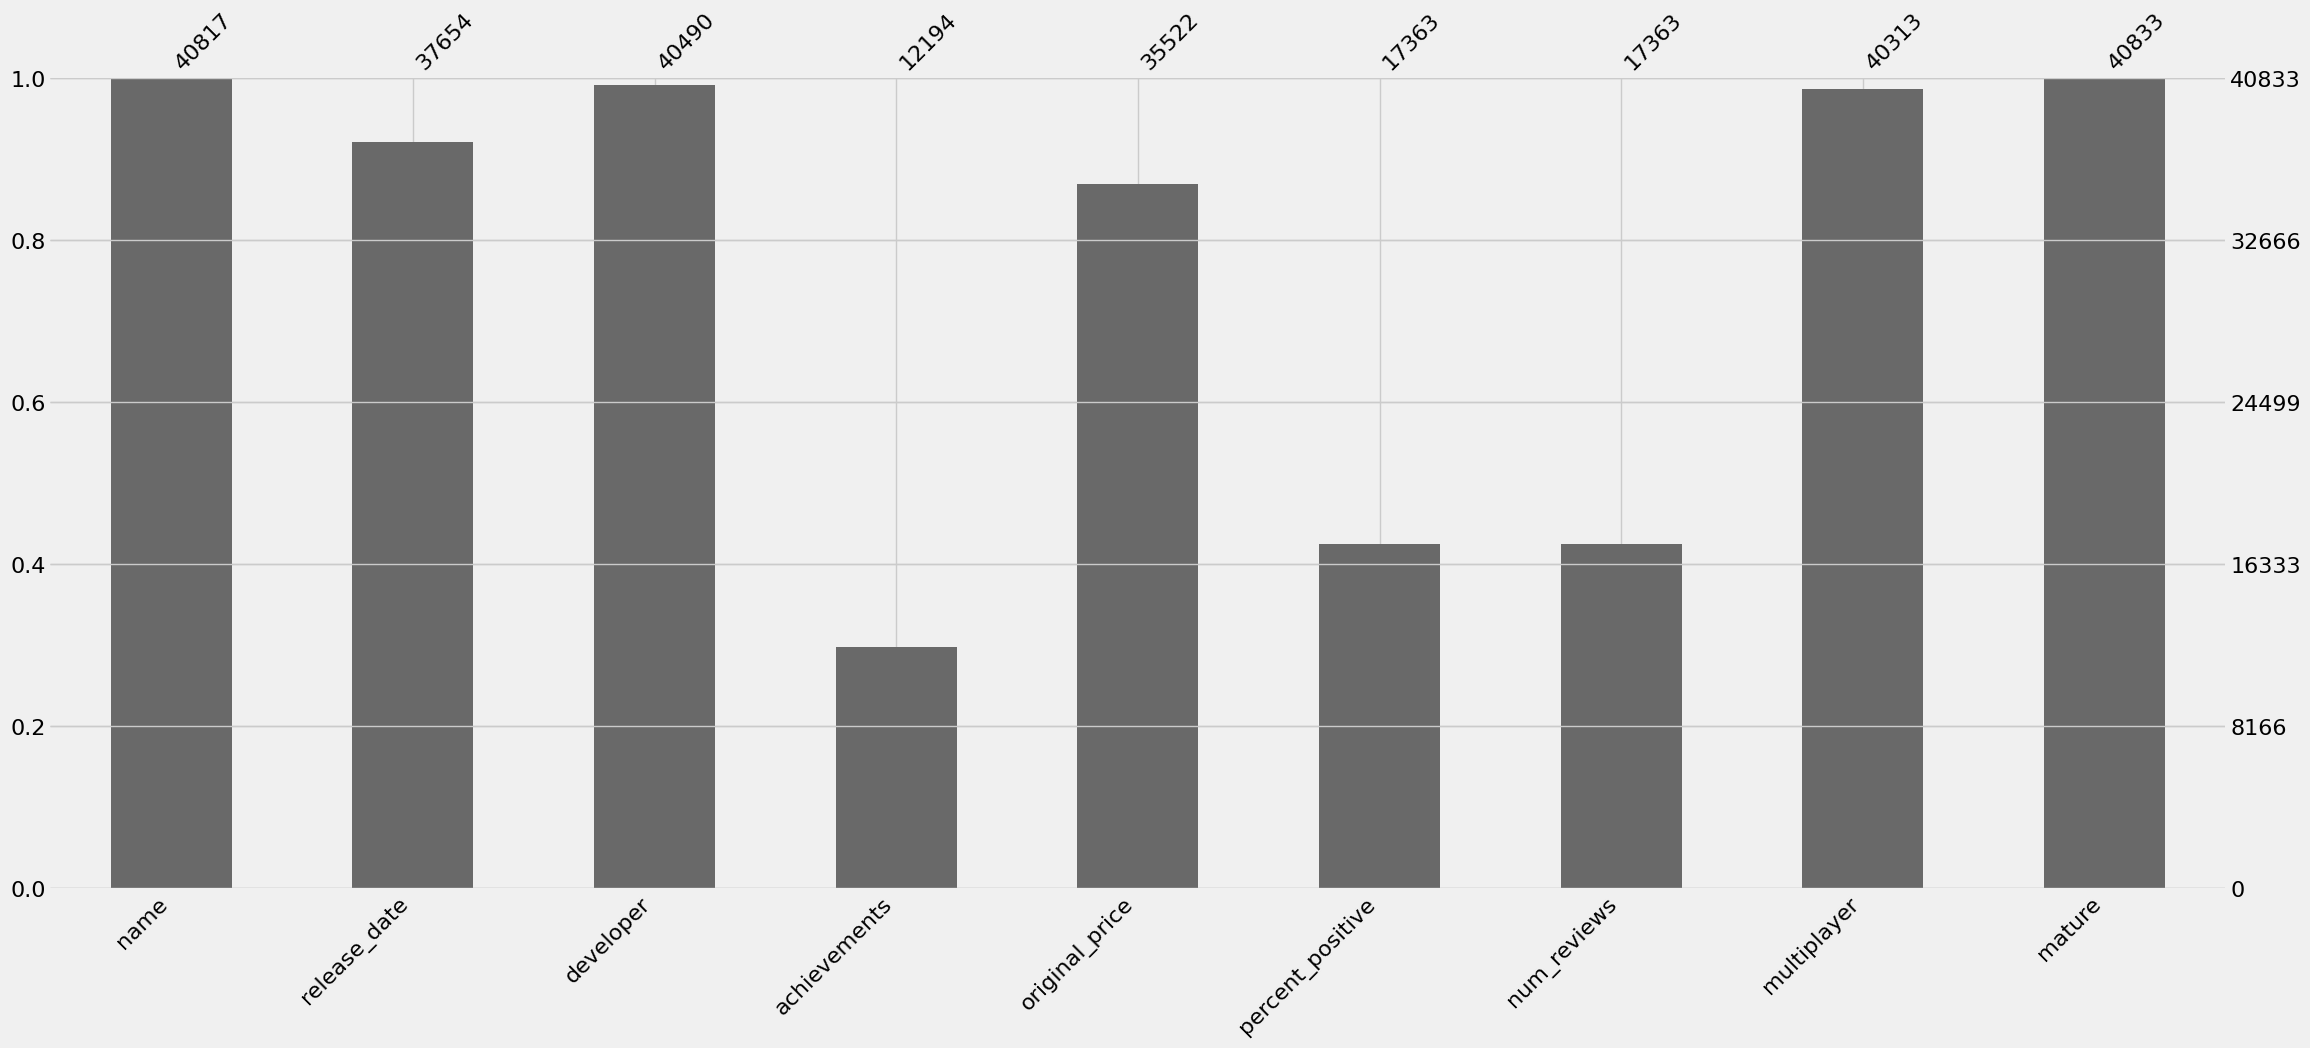

In [309]:
msno.bar(df_game)
plt.savefig('missing_values.jpeg')
plt.show()

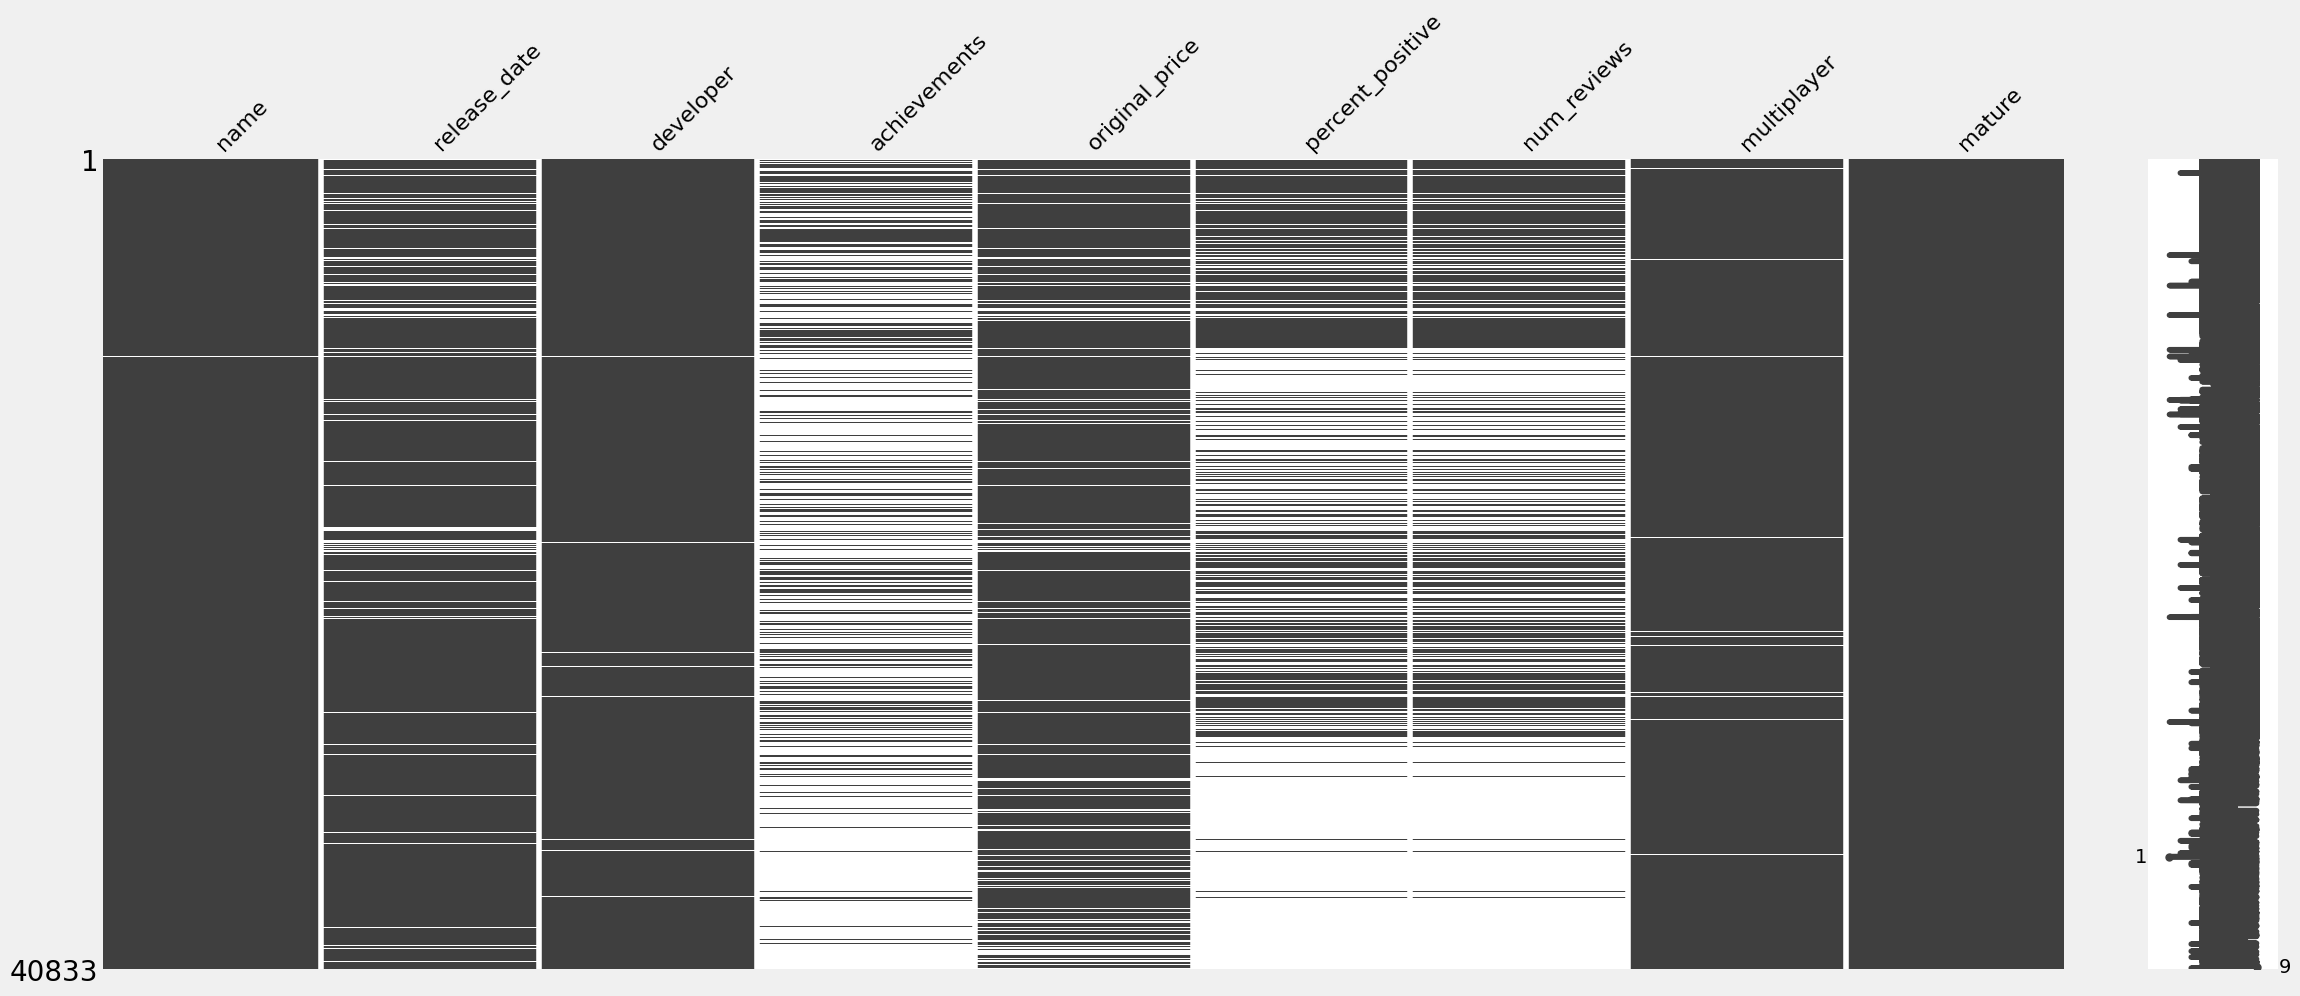

In [310]:
msno.matrix(df_game)
plt.show()

In [311]:
# Checking the missing values
df_game.isnull().sum()

name                   16
release_date         3179
developer             343
achievements        28639
original_price       5311
percent_positive    23470
num_reviews         23470
multiplayer           520
mature                  0
dtype: int64

so, we can see, there is the presence of missing value in our dataset, we will drop them in the following.

## d- cleaning Data

In [312]:
# Dropping the records where missing values exists.
df_game.dropna(inplace = True)

# Checking the missing values
df_game.isnull().sum()

name                0
release_date        0
developer           0
achievements        0
original_price      0
percent_positive    0
num_reviews         0
multiplayer         0
mature              0
dtype: int64

In [313]:
# the shape of df_game after the cleaning of missing value
df_game.shape

(8840, 9)

We have now 8840 observations with 9 variables.

In [314]:
# visualization of df_game
df_game.head(10)

name  release_date  \
0                                        DOOM  May 12, 2016   
1               PLAYERUNKNOWN'S BATTLEGROUNDS  Dec 21, 2017   
2                                  BATTLETECH  Apr 24, 2018   
6                             Devil May Cry 5   Mar 7, 2019   
7                            Human: Fall Flat  Jul 22, 2016   
8                           They Are Billions  Dec 12, 2017   
9                        Warhammer: Chaosbane  May 31, 2019   
10                               For The King  Apr 19, 2018   
11            Danganronpa V3: Killing Harmony  Sep 25, 2017   
13  Call of Duty®: Modern Warfare® Remastered  Jul 27, 2017   

                   developer  achievements original_price percent_positive  \
0                id Software          54.0         $19.99              92%   
1           PUBG Corporation          37.0         $29.99              49%   
2        Harebrained Schemes         128.0         $39.99              71%   
6           CAPCOM Co., Ltd.          51.0         $59.99              92%   
7            No Brakes Games          55.0         $14.99              91%   
8            Numantian Games          34.0         $29.99              85%   
9               Eko Software          43.0         $49.99              44%   
10             IronOak Games          72.0         $19.99              83%   
11  Spike Chunsoft Co., Ltd.          41.0         $39.99              84%   
13     Raven Software,Beenox          50.0          1.020              51%   

    num_reviews multiplayer  mature  
0       42550.0        True   False  
1      836608.0        True    True  
2        7030.0        True   False  
6        9645.0        True    True  
7       23763.0        True   False  
8       12127.0       False   False  
9         904.0        True    True  
10       4600.0        True   False  
11       3547.0       False   False  
13       1118.0        True   False

In [315]:
# we look at the modality of the variables
df_game.nunique()

name                8835
release_date        2166
developer           6112
achievements         334
original_price       290
percent_positive      95
num_reviews         2185
multiplayer            2
mature                 2
dtype: int64

In [316]:
# we look at the type of the variables
df_game.dtypes

name                 object
release_date         object
developer            object
achievements        float64
original_price       object
percent_positive     object
num_reviews         float64
multiplayer          object
mature                 bool
dtype: object

## d.1) cleaning the column "name"

In [317]:
df_game.name.unique()

array(['DOOM', "PLAYERUNKNOWN'S BATTLEGROUNDS", 'BATTLETECH', ...,
       'Detached: Non-VR Edition', 'A Room Beyond', 'Chasing the Stars'],
      dtype=object)

In [318]:
# we visualize the different name of video game
df_game.name.value_counts()

Ultimate Arena                                    2
Mars 2030                                         2
Ashes                                             2
Batman: Arkham City - Game of the Year Edition    2
RUSH                                              2
                                                 ..
Haven Moon                                        1
Polygon Attack                                    1
Too Many Weapons                                  1
Crystal City                                      1
Chasing the Stars                                 1
Name: name, Length: 8835, dtype: int64

In the following, We will categorize the name of the games in an another column.

In [319]:
# convert to categorical 
df_game["name_code"] = df_game["name"].astype("category").cat.codes
df_game.head(2)

name  release_date         developer  \
0                           DOOM  May 12, 2016       id Software   
1  PLAYERUNKNOWN'S BATTLEGROUNDS  Dec 21, 2017  PUBG Corporation   

   achievements original_price percent_positive  num_reviews multiplayer  \
0          54.0         $19.99              92%      42550.0        True   
1          37.0         $29.99              49%     836608.0        True   

   mature  name_code  
0   False       1751  
1    True       5220

## d.2) cleaning column "developer"

In [320]:
df_game.developer.unique()

array(['id Software', 'PUBG Corporation', 'Harebrained Schemes', ...,
       'Andreas Britten', 'Team Ninja Thumbs', 'René Bühling'],
      dtype=object)

In [321]:
# we visualize the different name of video game
df_game.developer.value_counts()

Choice of Games               52
KOEI TECMO GAMES CO., LTD.    26
Ripknot Systems               25
Hosted Games                  24
Square Enix                   21
                              ..
GoeX GameS                     1
STREAMWORKS                    1
Party for Introverts           1
Stranga,Tommah                 1
René Bühling                   1
Name: developer, Length: 6112, dtype: int64

We will categorize the developer in an another column.

In [322]:
## convert to categorical 
df_game["developer_code"]=df_game["developer"].astype("category").cat.codes

## d.3) cleaning columns "achievements" and "num_reviews"

In [323]:
df_game.describe()

achievements  num_reviews  name_code  developer_code
count       8840.00      8840.00    8840.00         8840.00
mean          93.17      1937.34    4416.70         3023.35
std          510.31     15353.19    2550.82         1765.00
min            1.00        10.00       0.00            0.00
25%           13.00        28.00    2207.75         1465.00
50%           24.00       101.00    4417.50         3005.00
75%           42.00       489.25    6625.25         4550.00
max         9821.00    836608.00    8834.00         6111.00

### a) achievements

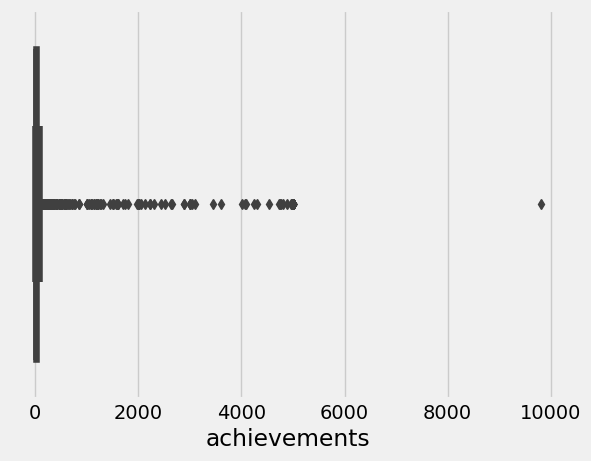

In [324]:
# see the outlier
sns.boxplot(x="achievements", data= df_game)
plt.show()

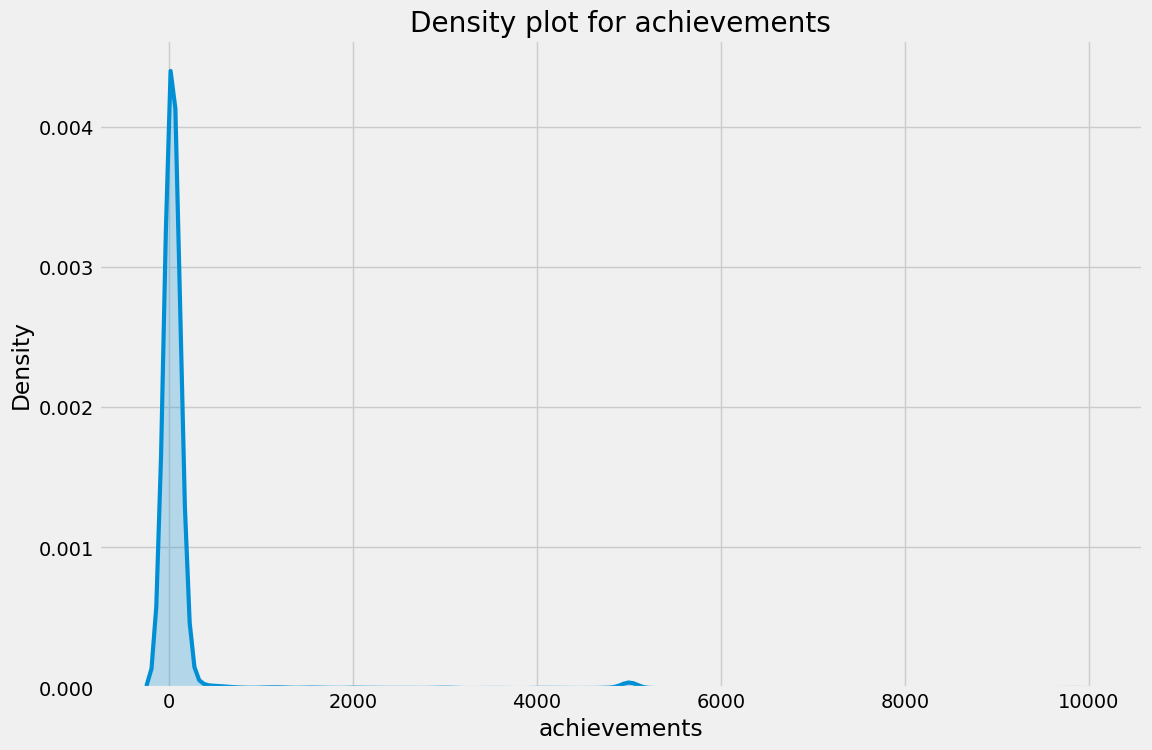

In [325]:
plt.figure(figsize=[12,8])
sns.distplot(df_game['achievements'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
plt.title('Density plot for achievements')
plt.savefig('density_achievements.jpeg')
plt.show()

there is the presence of outliers , so we remove them.

In [326]:
Q1 = df_game["achievements"].quantile(q=0.25)
Q3 = df_game["achievements"].quantile(q=0.75)
IQR = Q3-Q1
ul = Q3+1.5*IQR
ll = Q1-1.5*IQR

In [327]:
outliers = df_game[(df_game["achievements"] > ul) | (df_game["achievements"] < ll)]
outliers.shape

(644, 11)

We have around 644 outliers.

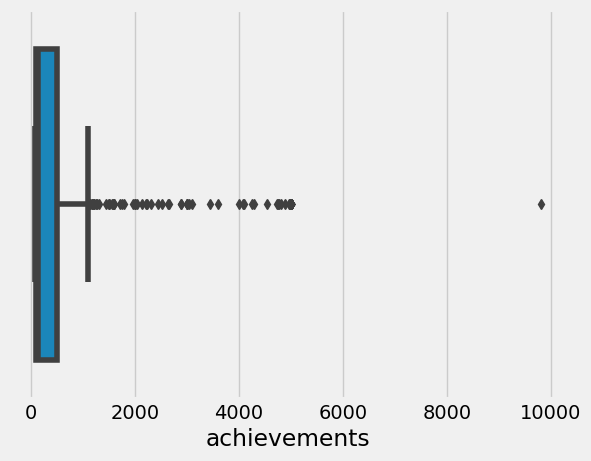

In [328]:
# We can see the 
sns.boxplot(x="achievements", data= outliers)
plt.show()

In [329]:
df_game = df_game[(df_game["achievements"] <= ul) & (df_game["achievements"] >= ll)]

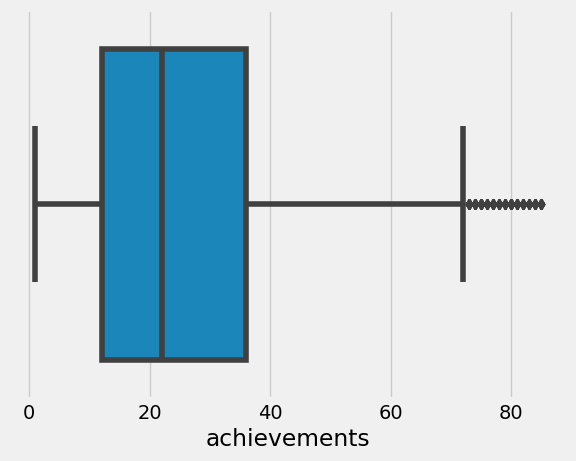

In [330]:
# boxplot after the cleaning
sns.boxplot(x="achievements", data= df_game)
plt.show()

### b) num_reviews

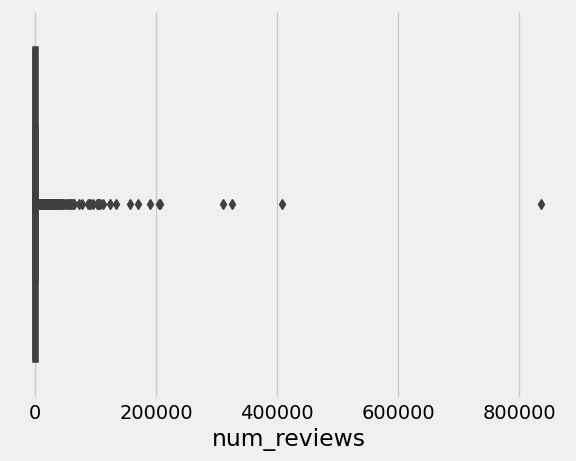

In [331]:
# see the outlier
sns.boxplot(x="num_reviews", data=df_game)
plt.show()

there is the presence of outliers , so we remove them

In [332]:
Q1_reviews = df_game["num_reviews"].quantile(q=0.25)
Q3_reviews = df_game["num_reviews"].quantile(q=0.75)
IQR = Q3_reviews-Q1_reviews
ul_reviews = Q3_reviews+1.5*IQR
ll_reviews = Q1_reviews-1.5*IQR

In [333]:
outliers_reviews = df_game[(df_game["num_reviews"] > ul_reviews) | (df_game["num_reviews"] < ll_reviews)]
outliers_reviews.shape

(1286, 11)

In [334]:
outliers_reviews["num_reviews"].max()

836608.0

we can see the outliers

In [335]:
df_game = df_game[(df_game["num_reviews"] <= ul_reviews) & (df_game["num_reviews"] >= ll_reviews)]

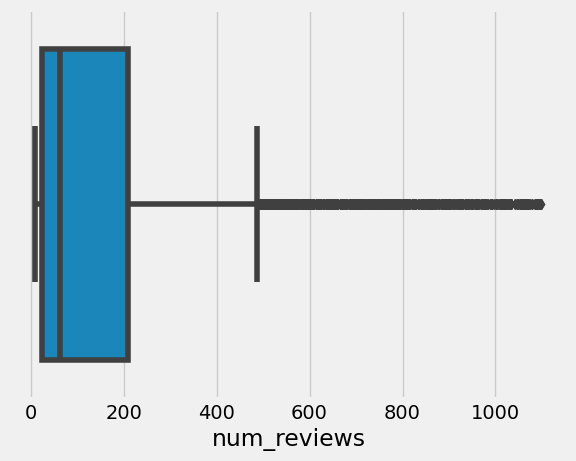

In [336]:
sns.boxplot(x="num_reviews", data=df_game)
plt.show()

## d-4) Cleaning "original price"

In [337]:
df_game["original_price"].unique()

array(['$49.99', '$29.99', '$39.99', '$24.99', '$19.99', '$13.99',
       '$4.99', '$59.99', '$9.99', '$12.99', '$7.99', '$14.99', '$11.99',
       '$31.99', '$16.99', '$52.98', '$39.98', '$8.99', 'Demo',
       'Free To Play', '$34.99', '$15.99', '$19.98', '$151.89', 'Free',
       '$67.96', '$17.99', 'Learn to Play Edition', '$20.00', '$18.99',
       '$264.82', '$16.66', '$1.99', '$19.95', '$3.99', '$12.00',
       '$10.99', '$6.99', 'The Black Watchmen Demo', '$2.99', '$44.99',
       '$21.99', 'Try our free demo!', 'Play demo for free',
       'Worbital: Online Demo', 'Free to Play', '$8.88',
       'New Retro Arcade: Neon (Tech Demo)', '$5.99', '$69.99', '$99.99',
       '$43.97', '$44.97', '$23.97', '1.020', 'Free Demo',
       'Realpolitiks Demo', '$109.96', '$64.94', 'Sunrider Academy Demo',
       '$5.49', '$79.95', 'Unbox Demo', '$20.99', '$54.97', '$59.96',
       '$39.96', '$501.87', '$0.99', 'Install Demo',
       'Hunting Simulator Demo', 'Geneshift Free Edition',
      

In [338]:
# create list free and demo named free_demo
free_demo=['Demo Middle-earth™: Shadow of War™','Free To Play','Shadow of the Tomb Raider Free Trial','FINAL FANTASY XV WINDOWS EDITION PLAYABLE DEMO','Demo', 'CrossCode Demo','Demo','CrossCode Demo','Play for Free!','Free','SpeedRunners Party Mode','Learn to Play Edition','LudoNarraCon demo','Note: Your saved progress will transfer to the full game, if purchased.','The Black Watchmen Demo', 'Play Demo!','Cat Quest Demo','LudoNarraCon Demo','Try our free demo!','Play demo for free','Worbital: Online Demo','Dungeon Siege III Demo','New Retro Arcade: Neon (Tech Demo)','Castlevania: Lords of Shadow 2 Demo','Free Demo','Realpolitiks Demo','Salt Demo', 'Sunrider Academy Demo','Unbox Demo','Install Demo', 'Hunting Simulator Demo','Geneshift Free Edition', 'The Textorcist: Demo','Try it NOW!','Experience Quasar Spectrum OS for Free','Jumps Demo','Dont Knock Twice VR Demo','Play WARMACHINE: Tactics Demo','SoulHunt Demo', 'Walkerman Prologue','Winds Of Trade Demo', 'DEMO','Free Movie','Download demo','The Norwood Suite Demo','灰烬天国 UnconqueredCastle', 'Try Demo','Play the Demo','Protonwar Demo', 'Free Mod', 'Just Get Through Demo', "A Bastard's Tale Demo", 'Download Free Guest Edition','Demo version', '试玩版','Download Demo','Free Demo ( ͡~ ͜ʖ ͡°)', 'Sanguine Sanctum Demo','Planets Under Attack Demo','Unholy Heights Trial Version', 'Download Demo !', 'Sym Demo','ViSP Demo', 'Try before you buy!','LABEL','Give it a swing!', 'Gorescript Demo', 'FREE DOWNLOAD','Penarium Demo','Spaceman Sparkles 3 Demo','Chuusotsu - 1st Graduation: Time After Time English Demo','SoulSet Demo', 'Chapter I: The Cross-bearing Man','Playable demo of Upwards, Lonely Robot','Horizon Shift Demo', 'Escape Legacy - Short Demo', "The Last Dream: Developer's Edition Demo",
'A Golden Wake - Demo', 'Circuit Breakers Demo', 'Inked - Demo','Demo-version','Infinium Strike Demo', "Hunter's Legacy Demo", 'Crying is not Enough: Demo','The Apartment Demo', 'Statues Demo', 'Arcane Raise - Aurora Novus','Horse Racing 2016 (Demo)', 'PROLOGUE', 'Black Hole Hazard Demo','Free DEMO!', 'Try the free demo!', 'Soulblight Demo','Patterna Demo', 'PLAY WITH ME Demo', 'Dyadic Demo','Play Rage in Peace Demo', 'TRY THE FREE DEMO!','Arcade Spirits Demo','Try the demo','Try the free demo:', 'A Case of Distrust Demo','Free to Play']

In [339]:
df_game["original_price_bis"] = df_game["original_price"].replace(free_demo,'$0.00')

In [340]:
df_game["original_price_bis"] = df_game["original_price_bis"].replace(['1.020','650560'],["$1.020","$650560"])

In [341]:
df_game["original_price_bis"].unique()

array(['$49.99', '$29.99', '$39.99', '$24.99', '$19.99', '$13.99',
       '$4.99', '$59.99', '$9.99', '$12.99', '$7.99', '$14.99', '$11.99',
       '$31.99', '$16.99', '$52.98', '$39.98', '$8.99', '$0.00', '$34.99',
       '$15.99', '$19.98', '$151.89', '$67.96', '$17.99', '$20.00',
       '$18.99', '$264.82', '$16.66', '$1.99', '$19.95', '$3.99',
       '$12.00', '$10.99', '$6.99', '$2.99', '$44.99', '$21.99', '$8.88',
       '$5.99', '$69.99', '$99.99', '$43.97', '$44.97', '$23.97',
       '$1.020', '$109.96', '$64.94', '$5.49', '$79.95', '$20.99',
       '$54.97', '$59.96', '$39.96', '$501.87', '$0.99', '$60.93',
       '$14.94', '$130.92', '$65.93', '$44.96', '$107.87', '$88.94',
       '$11.96', '$5.65', '$17.95', '$475.60', '$80.81', '$31.94',
       '$27.88', '$39.97', '$41.94', '$1.98', '$13.86', '$59.95',
       '$14.85', '$34.93', '$59.92', '$89.95', '$172.67', '$47.86',
       '$164.73', '$259.54', '$70.84', '$86.56', '$2.97', '$9.97',
       '$109.93', '$63.86', '$24.92', '

In [342]:
# we remove $ in the "original_price_bis" and we assign the value in the variable "original_price_dollars"
df_game[['removed','Original_price_dollars']]=df_game.original_price_bis.str.split('$',expand=True)

In [343]:
df_game.Original_price_dollars.unique()

array(['49.99', '29.99', '39.99', '24.99', '19.99', '13.99', '4.99',
       '59.99', '9.99', '12.99', '7.99', '14.99', '11.99', '31.99',
       '16.99', '52.98', '39.98', '8.99', '0.00', '34.99', '15.99',
       '19.98', '151.89', '67.96', '17.99', '20.00', '18.99', '264.82',
       '16.66', '1.99', '19.95', '3.99', '12.00', '10.99', '6.99', '2.99',
       '44.99', '21.99', '8.88', '5.99', '69.99', '99.99', '43.97',
       '44.97', '23.97', '1.020', '109.96', '64.94', '5.49', '79.95',
       '20.99', '54.97', '59.96', '39.96', '501.87', '0.99', '60.93',
       '14.94', '130.92', '65.93', '44.96', '107.87', '88.94', '11.96',
       '5.65', '17.95', '475.60', '80.81', '31.94', '27.88', '39.97',
       '41.94', '1.98', '13.86', '59.95', '14.85', '34.93', '59.92',
       '89.95', '172.67', '47.86', '164.73', '259.54', '70.84', '86.56',
       '2.97', '9.97', '109.93', '63.86', '24.92', '2.49', '75.93',
       '1.87', '15.95', '9.90', '48.55', '10.92', '29.97', '15.97',
       '64.87', '24.

In [344]:
df_game['Original_price_dollars']  = df_game['Original_price_dollars'].apply(pd.to_numeric, errors='ignore', downcast='float')

In [345]:
df_game.head(2)

name  release_date  \
9                                Warhammer: Chaosbane  May 31, 2019   
21  Phoenix Wright: Ace Attorney Trilogy / 逆転裁判123...   Apr 9, 2019   

           developer  achievements original_price percent_positive  \
9       Eko Software          43.0         $49.99              44%   
21  CAPCOM Co., Ltd.          30.0         $29.99              97%   

    num_reviews multiplayer  mature  name_code  developer_code  \
9         904.0        True    True       8267            1582   
21        382.0       False   False       5340             807   

   original_price_bis removed  Original_price_dollars  
9              $49.99                           49.99  
21             $29.99                           29.99

In [346]:
df_game=df_game.drop(["removed"], axis=1)

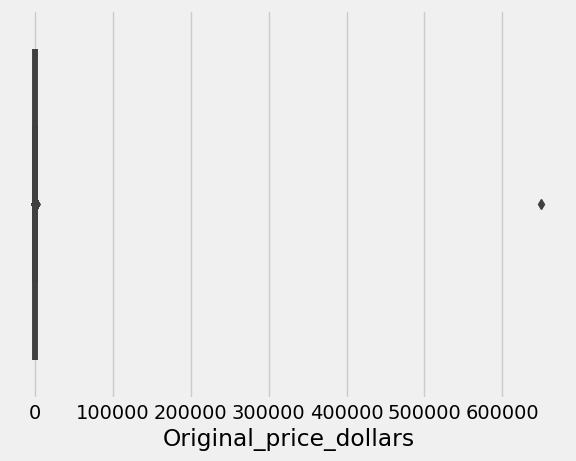

In [347]:
sns.boxplot(x="Original_price_dollars", data = df_game)
plt.show()

we can see the outliers in the variable "Original_price_dollars" so we remove them.

In [348]:
Q1_price = df_game["Original_price_dollars"].quantile(q=0.25)
Q3_price = df_game["Original_price_dollars"].quantile(q=0.75)
IQR = Q3_price-Q1_price
ul_price = Q3_price+1.5*IQR
ll_price = Q1_price-1.5*IQR

In [349]:
outliers_price = df_game[(df_game["Original_price_dollars"] > ul_price) | (df_game["Original_price_dollars"] < ll_price)]
outliers_price.shape

(354, 13)

In [350]:
df_game = df_game[(df_game["Original_price_dollars"] <= ul_price) & (df_game["Original_price_dollars"]>= ll_price)]

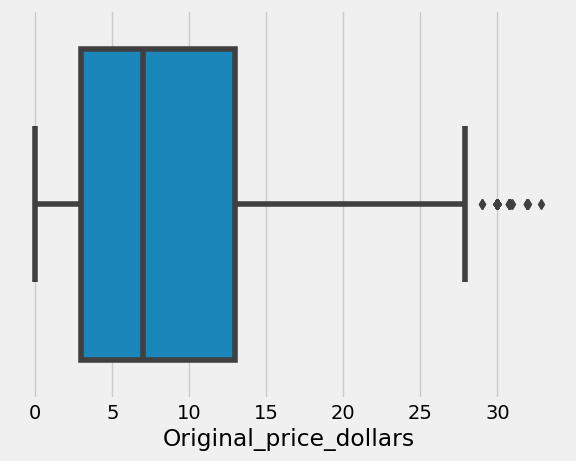

In [351]:
sns.boxplot(x="Original_price_dollars", data = df_game)
plt.show()

## d.6) Cleaning column "percent_positive"

In [352]:
# we look at the modality of percent_postive
df_game["percent_positive"].unique()

array(['97%', '100%', '94%', '80%', '98%', '71%', '82%', '95%', '68%',
       '81%', '83%', '86%', '92%', '75%', '87%', '85%', '78%', '76%',
       '93%', '88%', '72%', '79%', '89%', '70%', '66%', '90%', '91%',
       '46%', '77%', '74%', '51%', '58%', '64%', '62%', '60%', '49%',
       '99%', '63%', '57%', '84%', '69%', '96%', '40%', '65%', '73%',
       '56%', '67%', '61%', '59%', '53%', '42%', '48%', '45%', '47%',
       '55%', '43%', '52%', '50%', '54%', '41%', '44%', '23%', '37%',
       '35%', '28%', '33%', '29%', '31%', '21%', '38%', '25%', '30%',
       '27%', '39%', '36%', '9%', '32%', '18%', '34%', '13%', '22%',
       '20%', '26%', '24%', '17%', '14%', '0%', '6%', '7%', '19%', '16%',
       '8%', '3%', '15%', '12%'], dtype=object)

In [353]:
# take the number
print(df_game['percent_positive'].apply(lambda x: x.split('%')[0]).unique())

['97' '100' '94' '80' '98' '71' '82' '95' '68' '81' '83' '86' '92' '75'
 '87' '85' '78' '76' '93' '88' '72' '79' '89' '70' '66' '90' '91' '46'
 '77' '74' '51' '58' '64' '62' '60' '49' '99' '63' '57' '84' '69' '96'
 '40' '65' '73' '56' '67' '61' '59' '53' '42' '48' '45' '47' '55' '43'
 '52' '50' '54' '41' '44' '23' '37' '35' '28' '33' '29' '31' '21' '38'
 '25' '30' '27' '39' '36' '9' '32' '18' '34' '13' '22' '20' '26' '24' '17'
 '14' '0' '6' '7' '19' '16' '8' '3' '15' '12']


In [354]:
df_game['number_attributed'] = df_game['percent_positive'].apply(lambda x: str(x).split('%')[0])

In [355]:
df_game['number_attributed']  = df_game['number_attributed'] .astype("int") 

In [356]:
df_game["ratio_positive"] = df_game['number_attributed']/100

In [357]:
df_game=df_game.drop(["number_attributed"], axis=1)

## d.6) Cleaning the columns "multiplayer" and "mature"

### a) column multiplayer

In [358]:
# categorization of the column multiplayer
df_game["multiplayer"]=df_game["multiplayer"].astype("category")

### b) column mature

In [359]:
# categorization of the column mature
df_game["mature"]=df_game["mature"].astype("category")

## d.7 cleaning the column "release_date"

In [360]:
df_game["release_date"].unique()

array(['Apr 9, 2019', 'Jun 13, 2019', 'Oct 13, 2015', ..., 'Aug 31, 2008',
       'Sep 14, 2012', 'Apr 29, 2017'], dtype=object)

In [361]:
# we remove $ in the "original_price_bis" and we assign the value in the variable "original_price_dollars"
df_game[['month_date_release','year_release']]=df_game.release_date.str.split(',',expand=True)

In [362]:
df_game.head(2)

name  release_date  \
21  Phoenix Wright: Ace Attorney Trilogy / 逆転裁判123...   Apr 9, 2019   
41                       GOD WARS The Complete Legend  Jun 13, 2019   

              developer  achievements original_price percent_positive  \
21     CAPCOM Co., Ltd.          30.0         $29.99              97%   
41  KADOKAWA GAMES, LTD          31.0         $29.99             100%   

    num_reviews multiplayer mature  name_code  developer_code  \
21        382.0       False  False       5340             807   
41         11.0       False  False       2902            2691   

   original_price_bis  Original_price_dollars  ratio_positive  \
21             $29.99                   29.99            0.97   
41             $29.99                   29.99            1.00   

   month_date_release year_release  
21              Apr 9         2019  
41             Jun 13         2019

In [363]:
df_game=df_game.drop(["original_price_bis"], axis=1)

In [364]:
df_game["year_code"]=df_game["year_release"].astype("category").cat.codes

## e) Data Cleaning Summary

In [365]:
df_game.shape

(6556, 16)

In [366]:
df_game.columns

Index(['name', 'release_date', 'developer', 'achievements', 'original_price',
       'percent_positive', 'num_reviews', 'multiplayer', 'mature', 'name_code',
       'developer_code', 'Original_price_dollars', 'ratio_positive',
       'month_date_release', 'year_release', 'year_code'],
      dtype='object')

we summarize the data cleaning by the following steps:

- the detection and removal of missing data
- the categorization of the variables "name", "developer", "multiplayer" and "mature
- the detection and removal of outliers for the variables "achievements" "num_reviews
- the creation of a new column named original_price_dollars without the "$" symbol and the addition of zero dollars when we are in the cases of "Free" and "Demo", etc. In the variable we have removed the outliers.
- the creation of a new column named "ratio" that will not take the percentage of the percent_positive variable but rather the ratio 
- the creation of two columns "year_release" and "month_date_release" in order to split the "release_date" variable.I have categorized the variable "year_release" 

NB: In the folowing, after the cleaning I keep the variables: 
- name_code,
- developer_code,
- achievements,
- num_reviews,
- multiplayer,
- mature,
- Original_price_dollars,
- ratio_positive,
- year_code 

in order to do the analysis.

# 4) Statistics and Visualisation

In this part , we will produce statistics and visualisation.

## a) Statistics

In [367]:
df_game.describe()

achievements  num_reviews  name_code  developer_code  \
count       6556.00      6556.00    6556.00         6556.00   
mean          24.00       163.23    4382.90         3063.49   
std           16.49       223.16    2543.05         1771.28   
min            1.00        10.00       0.00            0.00   
25%           12.00        24.00    2203.50         1542.75   
50%           20.00        62.00    4384.50         3069.50   
75%           32.00       204.00    6584.25         4580.25   
max           85.00      1099.00    8834.00         6111.00   

       Original_price_dollars  ratio_positive  year_code  
count                 6556.00         6556.00    6556.00  
mean                     8.72            0.76      23.32  
std                      7.18            0.17       2.38  
min                      0.00            0.00      -1.00  
25%                      2.99            0.66      22.00  
50%                      6.99            0.79      24.00  
75%                     12.99            0.89      25.00  
max                     32.86            1.00      26.00

We see the informations following:
-  the mean number of ‘achievements’ players can earn in the game is around 24
- the mean total number of players who reviewed the game is around 163
- the mean price of the video game is around 9 dollars
- the mean percentage of players who review the game positively is around 76%. so ,video games have a good reputation for users.

# correlation

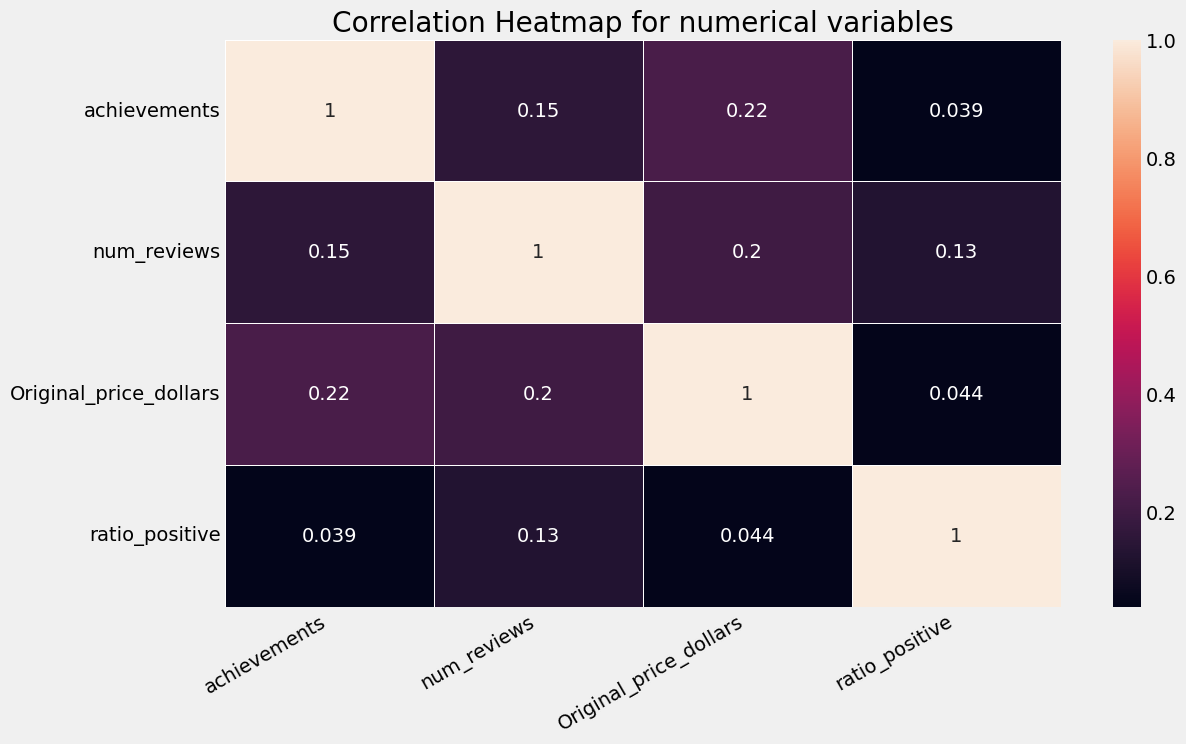

In [368]:

# Correlation for numerical variable
corrmat = df_game[['achievements', 'num_reviews','Original_price_dollars','ratio_positive']].corr()
#Pearson Correlation for numerical features
plt.figure(figsize=(12,7))
sns.heatmap(corrmat, vmax=1, annot=True, linewidths=.5)
plt.xticks(rotation=30, horizontalalignment="right")
plt.title('Correlation Heatmap for numerical variables')
plt.savefig('correlation.jpeg')
plt.show()

There is positive correlation between the price of the video game and the number of ‘achievements’ players can earn in the
game and between the price of the video game and the total number of players who reviewed the game.
There is also , a positive correlation between the number of ‘achievements’ players can earn in the game and the total number of players who reviewed the game.
Moreover, there is a positive correlation between r, the percentage of players who review the game positively and the total number of players who reviewed the game.
However, these correlations are not large, they are between 0.13 and 0.22

## b) Visualisation

## Density of positive ratio

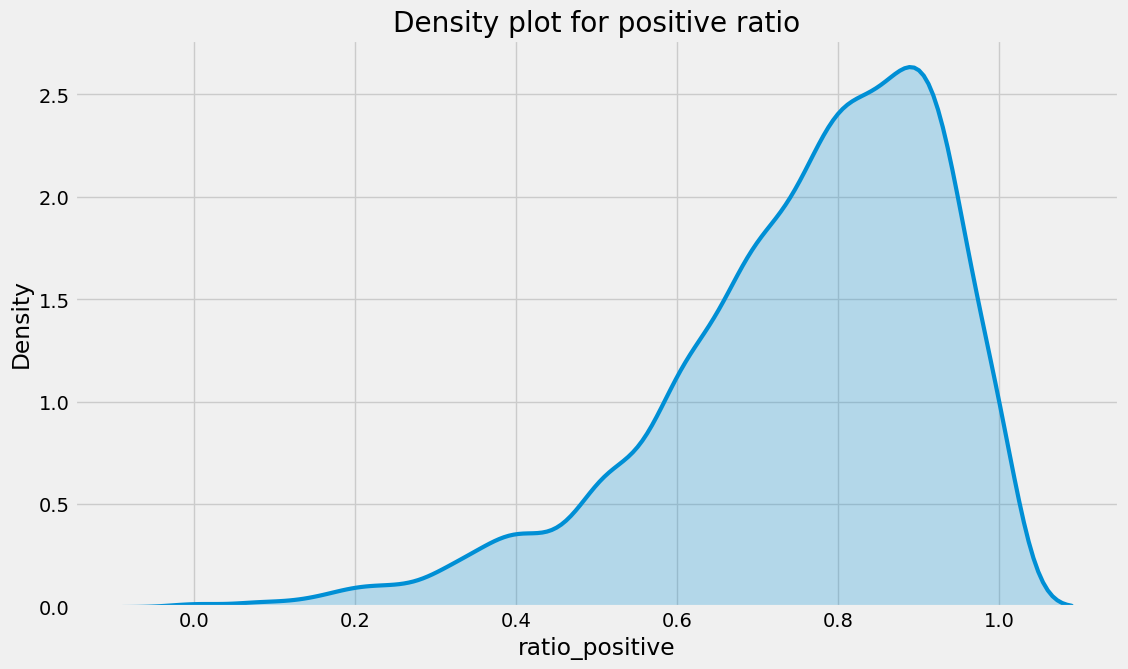

In [369]:

plt.figure(figsize=[12,7])
sns.distplot(df_game['ratio_positive'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
plt.title('Density plot for positive ratio')
plt.savefig('density_ratio_positive.jpeg')
plt.show()

This graph confirm the good reputation of video games

##  The number of game that has mature content unsuitable for younger players or not

<AxesSubplot:xlabel='mature', ylabel='count'>

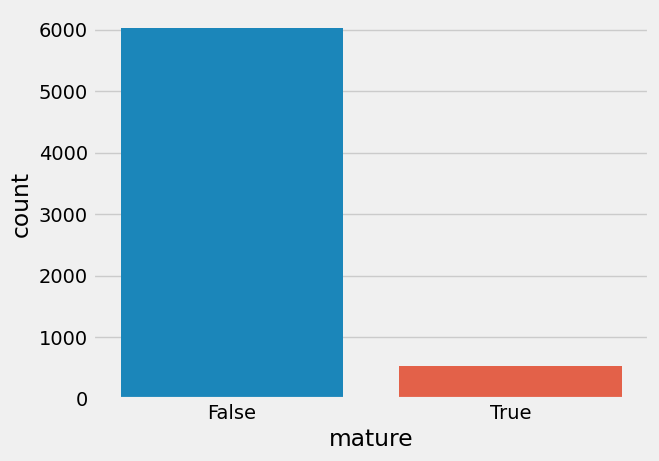

In [370]:
sns.countplot(df_game['mature'])

There are more games that do not have mature content.

## Relationship between the achievments , the number of reviews, the original price ,the positive ratio by the fact that the game has mature content unsuitable for younger players (True) or not (False)

<Figure size 1200x600 with 0 Axes>

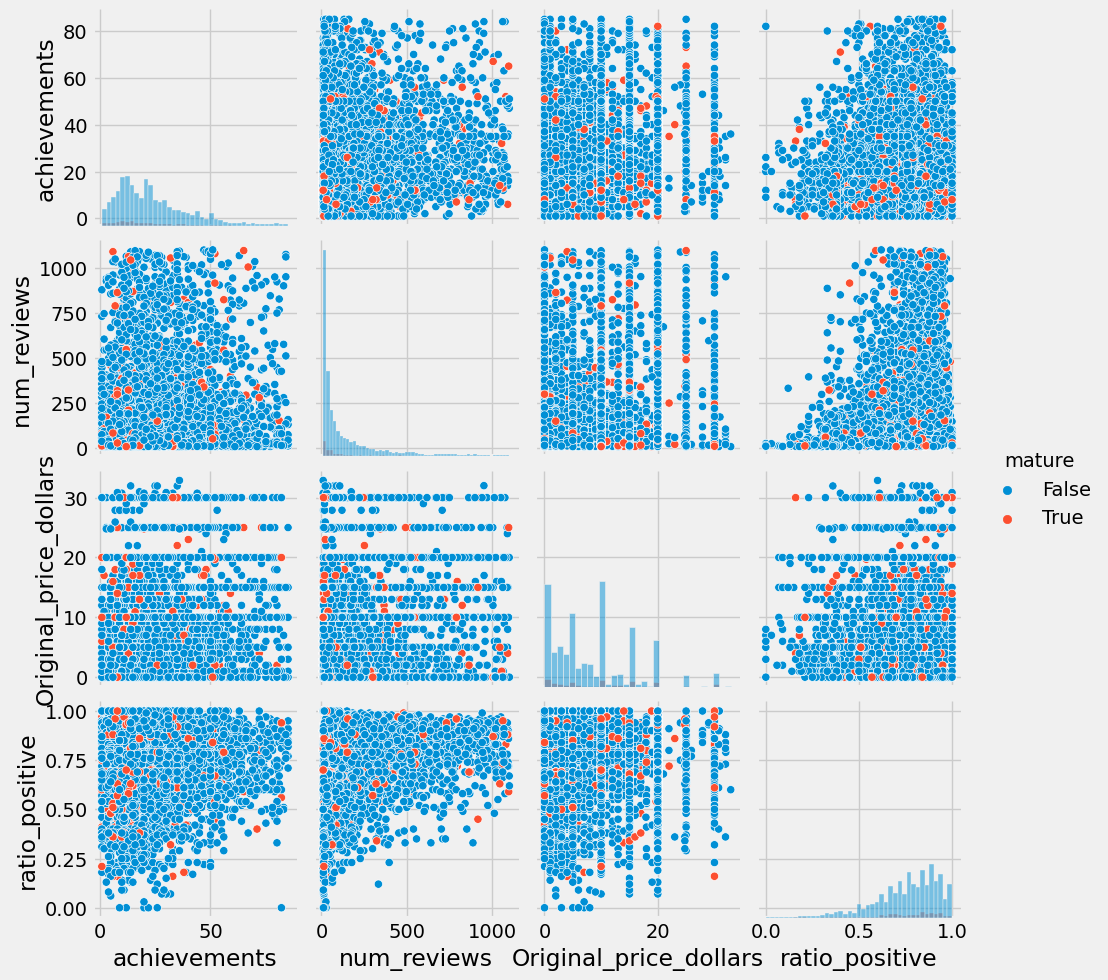

In [371]:
plt.figure(figsize=(12,6))
sns.pairplot(df_game[['achievements', 'num_reviews','Original_price_dollars','ratio_positive','mature']], kind="scatter", diag_kind="hist", hue="mature")
plt.show()

We can see the relations between the numericals variables by the fact that the game has mature content
unsuitable for younger players (True) or not (False). So, most games do not have mature content.However,
According to the ratio that evaluates the game positively, games with mature content do not have a percentage equal to zero both in terms of the total number of players who have reviewed the game, both in terms of the number of "achievements" that players can get in the game, both in terms of the price of the video game (or "Free" for free titles)

## Relationship between the achievments , the number of reviews, the original price ,the positive ratio by the fact the game has multiplayer (True) or not (False)

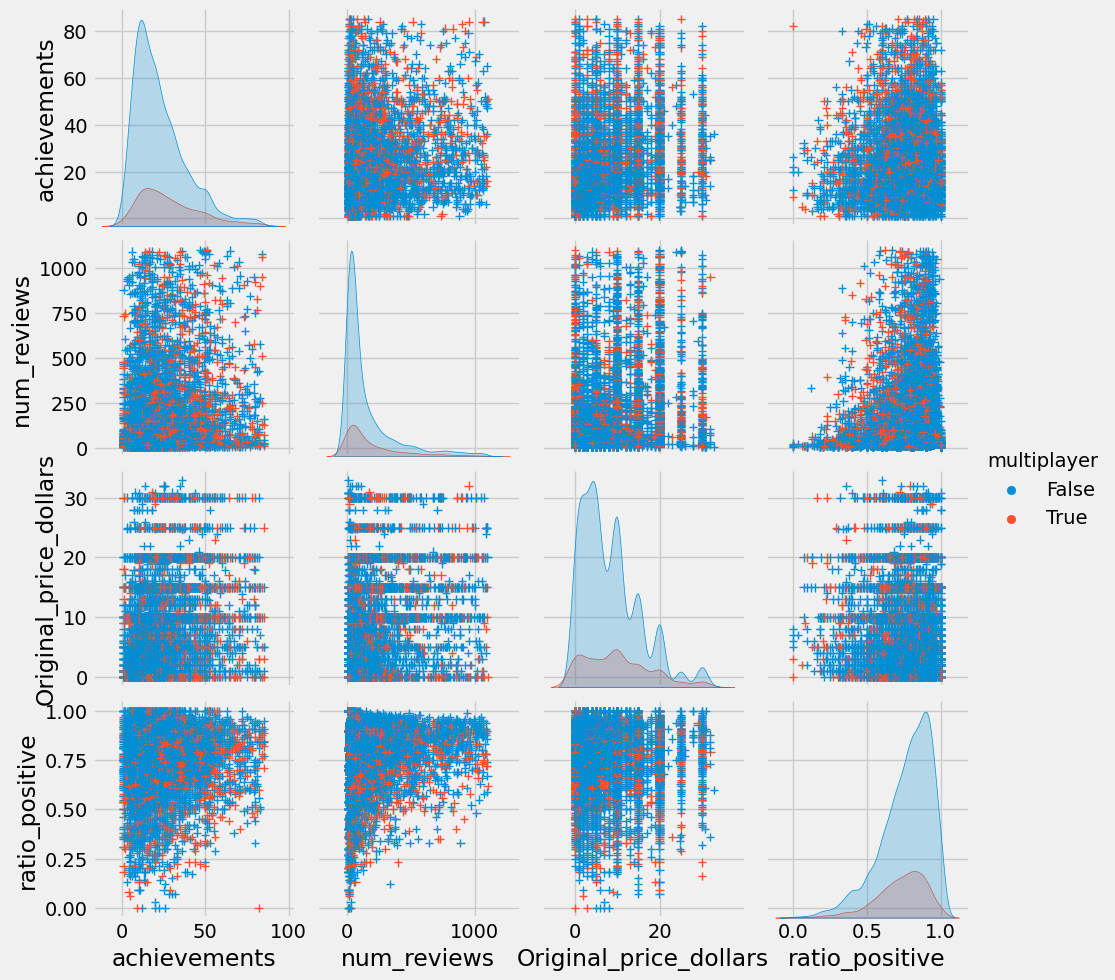

In [372]:
sns.pairplot(df_game[['achievements', 'num_reviews','Original_price_dollars','ratio_positive','multiplayer']], kind="scatter", diag_kind="kde",plot_kws=dict(marker="+", linewidth=1), hue="multiplayer")
plt.show()

We can see the relations between the numericals variables by the fact the game has multiplayer (True) or not (False).So, we have most games do not have a multiplayer by the variable the achievments , the number of reviews, the original price and the positive ratio.

## Relationship between the positive ratio and the multiplayer

<AxesSubplot:xlabel='multiplayer', ylabel='ratio_positive'>

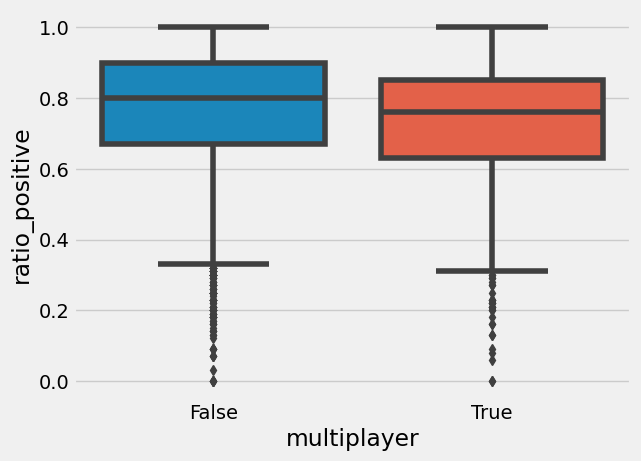

In [373]:
# boxplot
sns.boxplot(x="multiplayer",y="ratio_positive",data=df_game)

we can see that 50% of video games that don't have the multiplayer have 80% of players who review the game
positively.
The video games that don't have the multiplayer are the most appreciated.

## Relationship between the positive ratio and the mature

<AxesSubplot:xlabel='mature', ylabel='ratio_positive'>

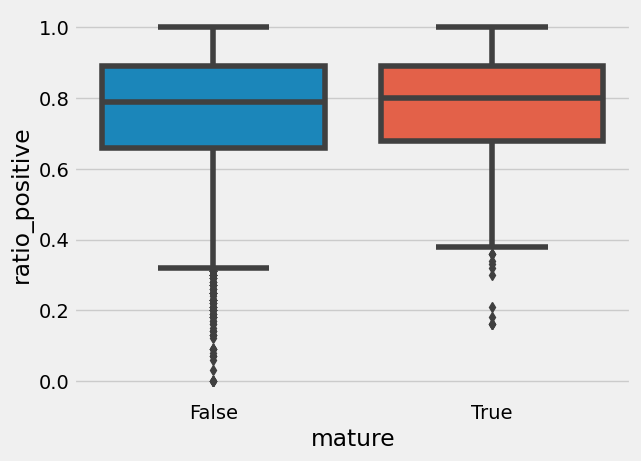

In [374]:
# boxplot
sns.boxplot(x="mature",y="ratio_positive",data=df_game)

50% of games that has mature content unsuitable for younger players have 80% of players who review the game
positively.
50% of games that has mature content suitable for younger players have also 80% of players who review the game
positively.

## Relationship between the mean total number of players who reviewed the game and the year release of game.

In [375]:
mean_views = df_game['num_reviews'].mean()
mean_views.round(2)

163.23

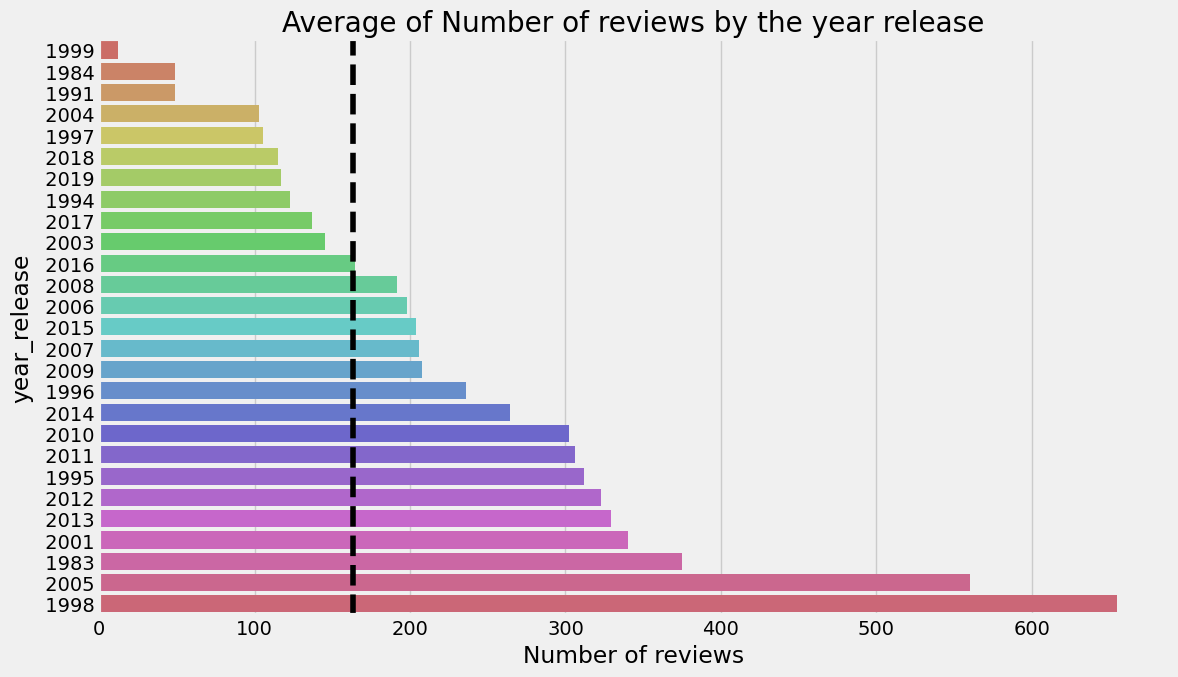

In [376]:
group_gameyear = df_game.groupby(['year_release']).agg({'num_reviews' : np.mean}).reset_index().sort_values(by = ['num_reviews'])

plt.figure(figsize=(12,7), tight_layout=True)
colors = sns.color_palette('pastel')
sns.barplot(y = 'year_release',x = 'num_reviews',data = group_gameyear,palette = 'hls')
plt.xlabel('Number of reviews')
plt.ylabel('year_release')
plt.title('Average of Number of reviews by the year release')
plt.axvline(x = mean_views, color='black', linestyle='--')



plt.savefig('barplotgameyear.jpeg')
plt.show()

we can see that the videos games in 1998,2005,and 1983 have the most large mean total number of players 

## Relationship between the mean positive ratio and the year release of game.

In [377]:
mean_ratio = df_game['ratio_positive'].mean()
mean_ratio.round(2)

0.76

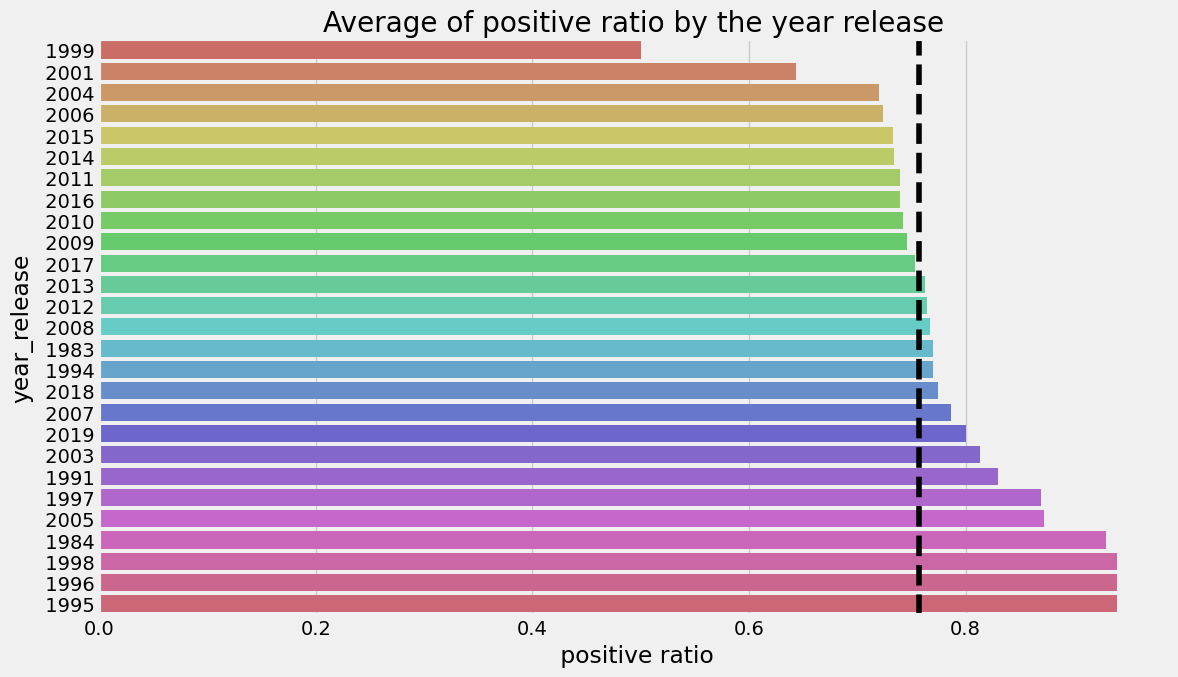

In [378]:
group_gameyear = df_game.groupby(['year_release']).agg({'ratio_positive' : np.mean}).reset_index().sort_values(by = ['ratio_positive'])

plt.figure(figsize=(12,7), tight_layout=True)
colors = sns.color_palette('pastel')
sns.barplot(y = 'year_release',x = 'ratio_positive',data = group_gameyear,palette = 'hls')
plt.xlabel(' positive ratio')
plt.ylabel('year_release')
plt.title('Average of positive ratio by the year release')
plt.axvline(x = mean_ratio, color='black', linestyle='--')



plt.savefig('barplotgameratio.jpeg')
plt.show()

we can see the videos games of 1995,1996,1998 have the most large mean percentage of players who review the game
positively.

## Summary of data visualisation and statistics

we have seen :
- the statistics for the numerical variables
- the correlation between numerical variables
- density of positive ratio
- the number of game that has mature content unsuitable for younger players or not
- the relationship between the achievments , the number of reviews, the original price ,the positive ratio by the fact that the game has mature content unsuitable for younger players (True) or not (False)
- The relationship between the achievments , the number of reviews, the original price ,the positive ratio by the fact the game has multiplayer (True) or not (False)
- The relationship between the positive ratio and the multiplayer
- The relationship between the positive ratio and the mature
- the relationship between the mean total number of players who reviewed the game and the year release of game
- the Relationship between the mean positive ratio and the year release of game

# 5-model fitting

In order to group similar video games we will use the KMeans. It is a clustering algorithm that divides data into K clusters or segments based on similarity metrics. So we will find the optimal number of clusters using the Elbow method.This method allow to know the best number of clusters.we take the first point that looks like the elbow. It is the point from which the loss function starts to decrease

## 1- All variables 

In [379]:
# variables used
df_game_model_all=df_game[['achievements','num_reviews','Original_price_dollars','ratio_positive','name','name_code','developer','developer_code','multiplayer', 'mature',"year_code"]]

In [380]:
# numerical variables
df_game_model = df_game[['achievements','num_reviews','Original_price_dollars','ratio_positive']]

In [381]:
# categorical variables
df_game_model_cat= df_game[["name_code","developer_code",'multiplayer', 'mature','year_code']]

In [382]:
#Feature Scaling
sc = MinMaxScaler()
df_game_model_numerical_allvar_num = sc.fit_transform(df_game_model)

In [383]:
df_game_model_numerical_allvar_num

array([[3.45238095e-01, 3.41597796e-01, 9.12659745e-01, 9.70000000e-01],
       [3.57142857e-01, 9.18273646e-04, 9.12659745e-01, 1.00000000e+00],
       [2.26190476e-01, 3.73737374e-01, 7.60499066e-01, 9.40000000e-01],
       ...,
       [5.47619048e-01, 3.67309458e-03, 4.56177708e-01, 7.80000000e-01],
       [5.11904762e-01, 9.18273646e-04, 2.43152758e-01, 9.00000000e-01],
       [1.30952381e-01, 0.00000000e+00, 3.04017029e-01, 7.00000000e-01]])

In [384]:
# convert the dataframe of categorical varaiable in  numpy
df_game_cat_np= df_game_model_cat.to_numpy()

In [385]:
# concatenate df_game_model_numerical_allvar and df_game_cat_np
df_game_model_numerical_cat = np.concatenate((df_game_model_numerical_allvar_num, df_game_cat_np),axis=1)

In [386]:
# verify if the concatenation is good
df_game_model_numerical_cat

array([[0.3452380952380952, 0.34159779614325064, 0.9126597447983829, ...,
        False, False, 26],
       [0.3571428571428571, 0.0009182736455463723, 0.9126597447983829,
        ..., False, False, 26],
       [0.22619047619047616, 0.3737373737373737, 0.7604990659448074, ...,
        True, False, 22],
       ...,
       [0.5476190476190477, 0.003673094582185491, 0.4561777082376563,
        ..., True, False, 25],
       [0.5119047619047619, 0.0009182736455463723, 0.24315275784265059,
        ..., False, False, 24],
       [0.13095238095238093, 0.0, 0.3040170293840808, ..., False, True,
        26]], dtype=object)

In [387]:
wc=[]
for i in range(2,10):
	kmeans_all = KMeans(n_clusters=i, random_state=42)
	kmeans_all.fit(df_game_model_numerical_cat)
	wc.append(kmeans_all.inertia_)

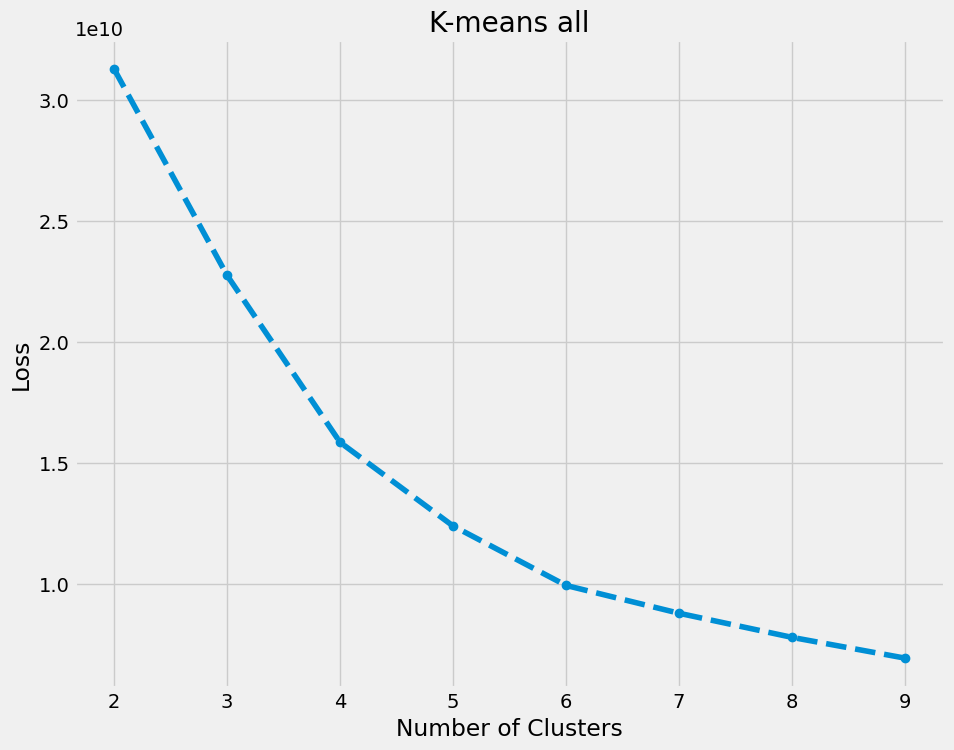

In [388]:
plt.figure(figsize=(10,8))
plt.plot(range(2,10),wc,marker='o',linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel("Loss")
plt.title("K-means all")
plt.show()

we can see the cluster 4 is the best according the Elbow method.

In [389]:
kmean = KMeans(4, random_state=42)
kmean.fit(df_game_model_numerical_cat)

KMeans(n_clusters=4, random_state=42)

In [390]:
kmean.labels_

array([3, 0, 3, ..., 0, 2, 0], dtype=int32)

In [391]:
identified_clusters_allvar = kmean.predict(df_game_model_numerical_cat)
identified_clusters_allvar

array([3, 0, 3, ..., 0, 2, 0], dtype=int32)

In [392]:
df_game_model_all["cluster"]=identified_clusters_allvar

In [393]:
df_game_model_all["segmentation"] = df_game_model_all["cluster"].map({0:'group 1',1:'group 2',2:'group 3',3:'group 4'})

## Clustering between  the number of ‘achievements’ players can earn in the game and the total number of players who reviewed the game

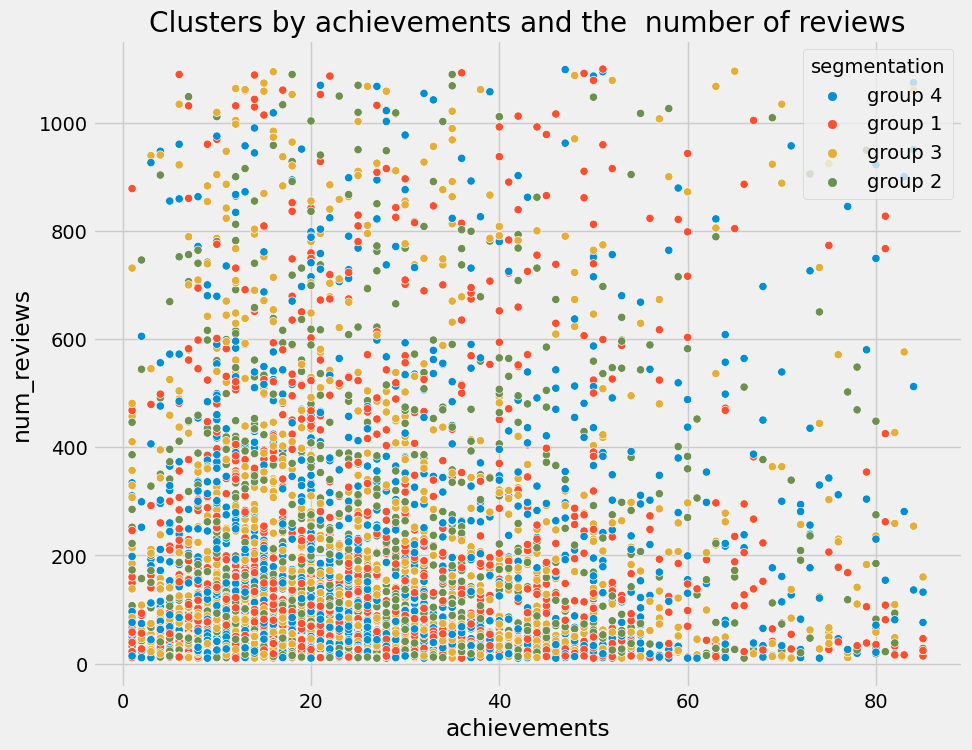

In [394]:
x_axis =  df_game_model_all['achievements']
y_axis = df_game_model_all['num_reviews']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis, hue =  df_game_model_all["segmentation"])
plt.title('Clusters by achievements and the  number of reviews')
plt.show()

## Clustering between  the number of ‘achievements’ players can earn in the game and the original price of game

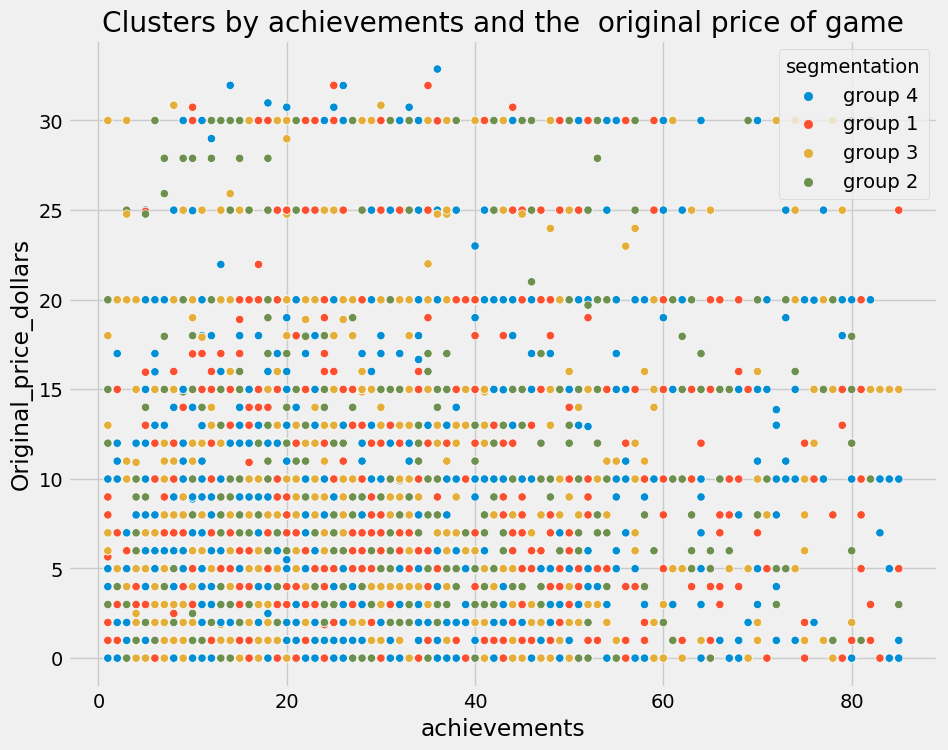

In [395]:
x_axis =   df_game_model_all['achievements']
y_axis =  df_game_model_all['Original_price_dollars']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis, hue =   df_game_model_all["segmentation"])
plt.title('Clusters by achievements and the  original price of game')
plt.show()

# Summary

we can see these different clusters represented in two dimensions (by achievements and original price in dollar and by achievements and the number of reviews) , it is normal that it is dispersed since these points depend on 9 dimensions. We have just represented them in two dimensions. Thus, we try to rename the different clusters according to the manager's will

## 2- All variables without the variables following "name_code","developer_code","year_code"

In [396]:
# categorical variables
df_game_model_cat_1= df_game[['multiplayer', 'mature']]

In [397]:
# convert the dataframe of categorical varaiable in  numpy
df_game_cat_np_1= df_game_model_cat_1.to_numpy()

In [398]:
# concatenate df_game_model_numerical_allvar and df_game_cat_np
df_game_model_numerical_cat_another = np.concatenate((df_game_model_numerical_allvar_num, df_game_cat_np_1),axis=1)

In [399]:
df_game_model_numerical_cat_another

array([[0.3452380952380952, 0.34159779614325064, 0.9126597447983829,
        0.97, False, False],
       [0.3571428571428571, 0.0009182736455463723, 0.9126597447983829,
        1.0, False, False],
       [0.22619047619047616, 0.3737373737373737, 0.7604990659448074,
        0.94, True, False],
       ...,
       [0.5476190476190477, 0.003673094582185491, 0.4561777082376563,
        0.78, True, False],
       [0.5119047619047619, 0.0009182736455463723, 0.24315275784265059,
        0.9, False, False],
       [0.13095238095238093, 0.0, 0.3040170293840808, 0.7, False, True]],
      dtype=object)

In [400]:
wcs=[]
for i in range(2,10):
	kmeans_without= KMeans(n_clusters=i, random_state=42)
	kmeans_without.fit(df_game_model_numerical_cat_another)
	wcs.append(kmeans_without.inertia_)

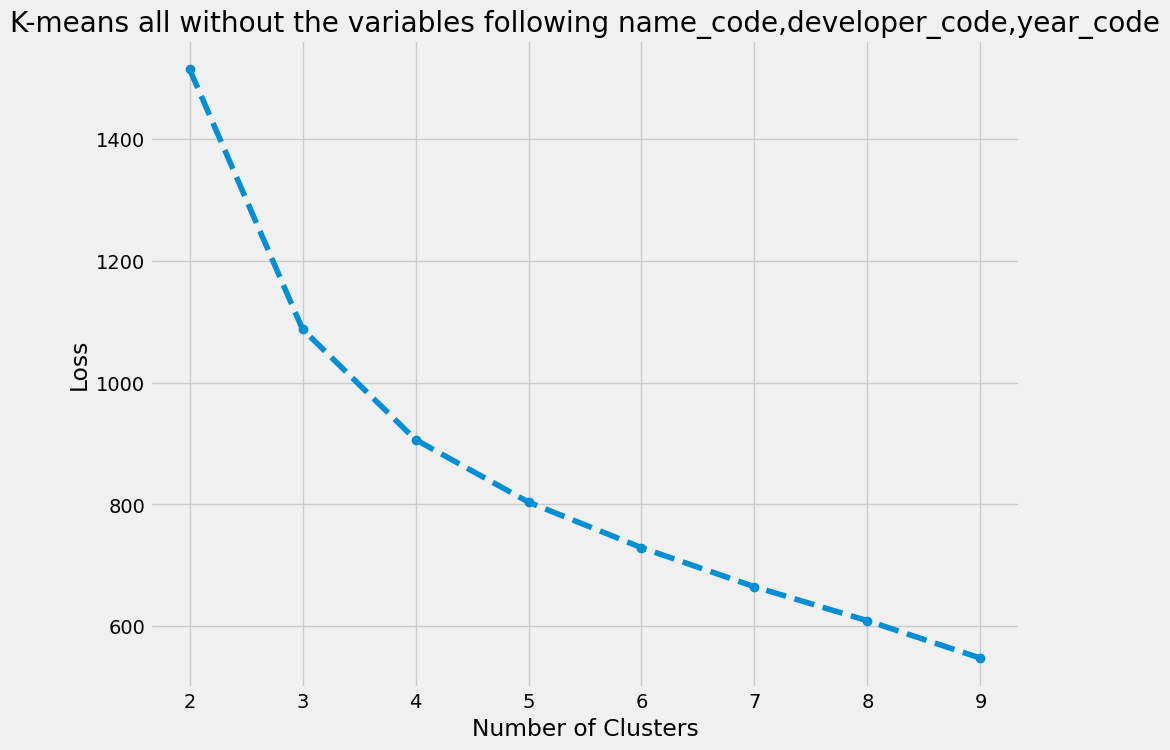

In [401]:
plt.figure(figsize=(10,8))
plt.plot(range(2,10),wcs,marker='o',linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel("Loss")
plt.title("K-means all without the variables following name_code,developer_code,year_code")
plt.show()

we can see the cluster 3 is the best according the Elbow method.

In [402]:
kmean_another = KMeans(3, random_state=42)
kmean_another.fit(df_game_model_numerical_cat_another)

KMeans(n_clusters=3, random_state=42)

In [403]:
identified_clusters_var = kmean_another.predict(df_game_model_numerical_cat_another)
identified_clusters_var

array([0, 0, 1, ..., 1, 0, 2], dtype=int32)

In [404]:
df_game_model_all["cluster_var1"]=identified_clusters_var

In [405]:
df_game_model_all["segmentation_var1"] = df_game_model_all["cluster_var1"].map({0:'group 1',1:'group 2',2:'group 3'})

## Clustering between  the number of ‘achievements’ players can earn in the game and he total number of players who reviewed the game

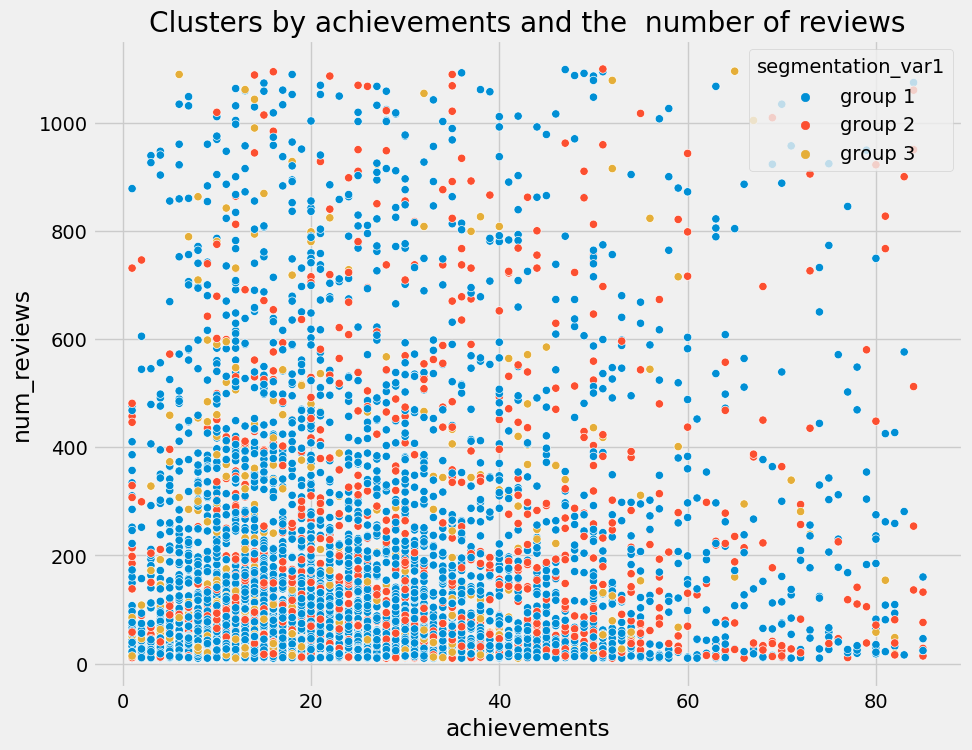

In [406]:
x_axis =  df_game_model_all['achievements']
y_axis = df_game_model_all['num_reviews']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis, hue =  df_game_model_all["segmentation_var1"])
plt.title('Clusters by achievements and the  number of reviews')
plt.show()

## Clustering between  the number of ‘achievements’ players can earn in the game and the original price of game in dollars

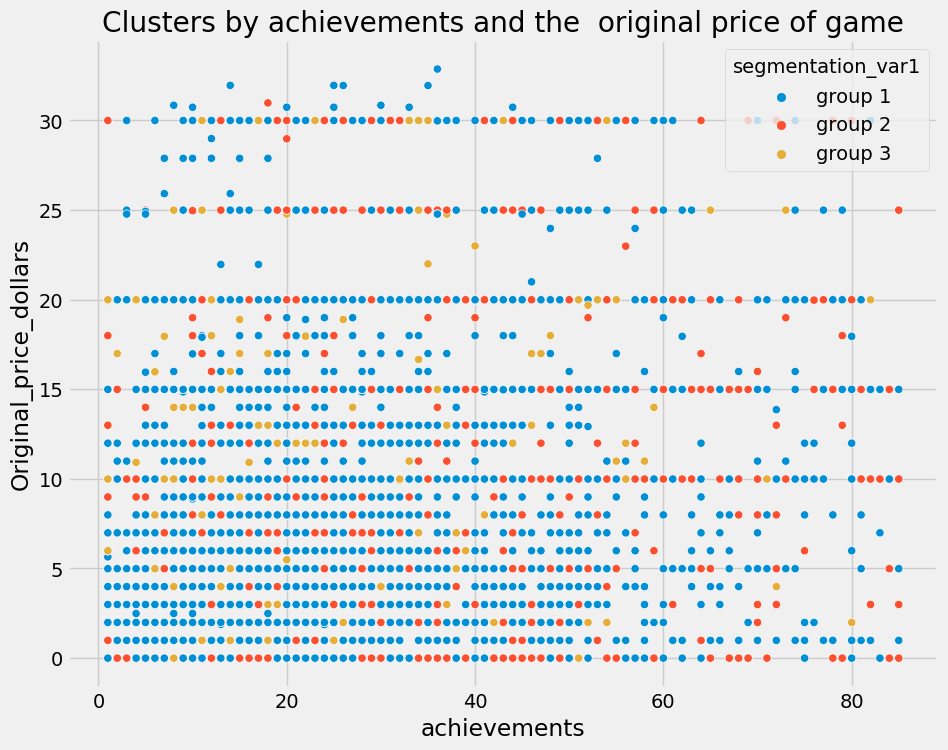

In [407]:
x_axis =   df_game_model_all['achievements']
y_axis =  df_game_model_all['Original_price_dollars']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis, hue =   df_game_model_all["segmentation_var1"])
plt.title('Clusters by achievements and the  original price of game')
plt.show()

## Summary

we notice that as we decrease the variables, the clusters do not become too unreadable

# 6 -Model evaluation

## All variables

In [408]:
kmeans_silhouette_all = silhouette_score(df_game_model_numerical_cat, kmean.labels_).round(2)
kmeans_silhouette_all

0.38

the score is not equal to 1 when I use  all variables. So ,overlapping clusters with samples very close to the decision limit of neighboring clusters

## All variables without the variables following "name_code","developer_code","year_code"

In [409]:
kmeans_silhouette_all_other = silhouette_score(df_game_model_numerical_cat_another, kmean_another.labels_).round(2)
kmeans_silhouette_all_other

0.55

Also, the score is not equal to 1 when I use  all variables without without the variables following "name_code","developer_code","year_code". So ,overlapping clusters with samples very close to the decision limit of neighboring clusters.However the score is better than the one where all the variables are used

# 7-Conclusion and Recommendation for next Step

# a) Conclusion

The objective of this project was to categorize the video games, more precisely to categorize them in no more than 5 groups.


In the cleaning of the data, there were many missing values, there were many outliers, there were transformations to be done on some variables 

In the statistical analysis and visualization, we saw that :
- the mean number of 'achievements' players can earn in the game is around 24
- the mean total number of players who reviewed the game is around 163
- the mean price of the video game is around 9 dollars
- the mean percentage of players who review the game positively is around 76%. so ,video games have a good reputation for users.

Also we saw that there is a positive correlation between the price of the video game and the number of 'achievements' players, between the price of the video game and the total number of players who reviewed the game, between, the number of 'achievements' players and the total number of players who reviewed the game, between the percentage of players who review the game positively and the total number of players who reviewed the game.

Furthermore we have seen that 
there are more non-mature games, and more games that do not have mulptiplayers.
Also the appreciation of mature games was not zero.
then we saw that 50% of games videos that don't have the multiplayer have 80% of players who review the game positively. 50% of the game that has mature content unsuitable for younger players have 80% of players who review the game positively. 50% of the game that has mature content suitable for younger players have also 80% of players who review the game
positively.

In addition, we saw that the videos games in 1998,2005,and 1983 have the largest mean total number of players .then the videos games of 1995,1996,1998 have the largest mean percentage of players who review the game positively



Finally, I built a machine learning model to categorize the video games, I used a clustering precisely from Kmeans, which is an alogorithm that makes clusters based on the minimum distance of the different observations across mathematically determined centers. I found a silhouette score of 0.38 when using all variables, which means that sometimes our clusters overlap. So, I tried to remove some variables that I suppose are not important, like "name_code" or "name", "developer_code" or "developper", "year_release" or "year_code" in order to see if the silhouette score improves. Indeed it improves to 0.55 when we take 3 clusters which represent the optimal clusters, so I think the second model will be more relevant. Also, we can focus on the different categories, and we can name them as we want.   

# b) Recommendation for next Step

the recommendations are multiple:

-we can precisely look at the similarity according to the names of the video games and the developers. it will be like a textual analysis

-we can use other clustering tools like DBSCAN, etc to compare to our model.

-We can still realize our model by using FAMD combined with Kmeans in order to improve our model 

-We can put our model into production by building a tool that will help us predict the category of the video game based on the characteristics expressed by the game user. We can use AWS, etc.

-We can think about the name of the clusters.



The data must be very clean to make a good analysis. Indeed, in this case, there was a lot of missing data and outliers.